# Kryptos — The Unsolved Fourth Tableau

## Assumptions and Facts

* The length of K4 is 97 characters. 
* The 64th-74th characters (1-indexed) of the code-text "NYPVTTMZFPK" form a one-to-one correspondence with plaintext "BERLINCLOCK".
* Jim Sanborn (JS) has hinted at a masking technique and an encryption technique (of unknown order and method) in the creation of K4. 
* K1 and K2 were encrypted using a Vigenere cipher, with a "KRYPTOS"-keyed English alphabet with keywords "PALIMPSEST" and "ABSCISSA," respectively.
* K3 was a transposition problem; that is to say, it was a rather difficult word-scramble puzzle. 
* The plaintext of K4 is in English.

## Some Jargon

Let variable $k4$ represent the string of the fourth tableau of Kryptos, and $soln$ represent the solution plaintext string. Suppose that there are two functions $f: s^n \rightarrow s^n$ and $g: s^n \rightarrow s^n$ involved in encrypting K4 such that $f(g(soln)) = k4$. Variable $s$ represents any arbitrary character in the English alphabet (case-agnostic); $n$ represents the number of characters; that is to say, both $f$ and $g$ are (hopefully) injective functions from strings of length n to other strings of length n. We make the assumption of injectivity based on the fact that there is only one plain-text solution.

We assume that $f$ and $g$ are invertible functions; that is to say, $g^{-1}(f^{-1}(k4)) =k4\_solved$.

This section will be updated as a reason more about the properties of these functions.

## My Steps

* I've written some cryptographic functions in Python3 dedicated to solving Kryptos, as well as other cryptanalytic techniques like Caesar cipher-solving, Vigenere cipher-solving (with custom-keyed alphabets), frequency analysis, and others.

### Proof of Concept

Here's my code showing that it can solve K1 and K2. Whitespace must be added manually; there is no whitespace in the original tableau text. K3 is a tougher beast.

In [95]:
k1 = 'EMUFPHZLRFAXYUSDJKZLDKRNSHGNFIVJYQTQUXQBQVYUVLLTREVJYQTMKYRDMFD'
k2 = "VFPJUDEEHZWETZYVGWHKKQETGFQJNCEGGWHKK?DQMCPFQZDQMMIAGPFXHQRLGTIMVMZJANQLVKQEDAGDVFRPJUNGEUNAQZGZLECGYUXUEENJTBJLBQCRTBJDFHRRYIZETKZEMVDUFKSJHKFWHKUWQLSZFTIHHDDDUVH?DWKBFUFPWNTDFIYCUQZEREEVLDKFEZMOQQJLTTUGSYQPFEUNLAVIDXFLGGTEZ?FKZBSFDQVGOGIPUFXHHDRKFFHQNTGPUAECNUVPDJMQCLQUMUNEDFQELZZVRRGKFFVOEEXBDMVPNFQXEZLGREDNQFMPNZGLFLPMRJQYALMGNUVPDXVKPDQUMEBEDMHDAFMJGZNUPLGEWJLLAETG"
k3 = 'ENDYAHROHNLSRHEOCPTEOIBIDYSHNAIACHTNREYULDSLLSLLNOHSNOSMRWXMNETPRNGATIHNRARPESLNNELEBLPIIACAEWMTWNDITEENRAHCTENEUDRETNHAEOETFOLSEDTIWENHAEIOYTEYQHEENCTAYCREIFTBRSPAMHHEWENATAMATEGYEERLBTEEFOASFIOTUETUAEOTOARMAEERTNRTIBSEDDNIAAHTTMSTEWPIEROAGRIEWFEBAECTDDHILCEIHSITEGOEAOSDDRYDLORITRKLMLEHAGTDHARDPNEOHMGFMFEUHEECDMRIPFEIMEHNLSSTTRTVDOHW?'

def decodeVigenere(msg, key, tabula=string.ascii_lowercase):
    decoded = list(msg)
    meaningfulIndex = 0
    for i in range(len(msg)):
        try:
            indexOfChar = tabula.index(msg[i])
            indexOfKeyChar = tabula.index(key[meaningfulIndex % len(key)])
            targetIndex = (indexOfChar - indexOfKeyChar + len(tabula)) % len(tabula)
            decoded[i] = tabula[targetIndex] 
            meaningfulIndex += 1
        except ValueError:
            decoded[i] = msg[i]
    return ''.join(decoded)

def tabulaOf(key, prepend=True, basis=string.ascii_lowercase):
    # used for encoding Kryptos!
    alphabetSubstring = tableauFilter(key, basis)
    if prepend:
        return key + alphabetSubstring
    else:
        return alphabetSubstring + key
    
def tableauFilter(key, alphabet):
    regex = re.compile('[' + key + ']')
    return regex.sub('', alphabet)
    
k1_plain = decodeVigenere(k1, "PALIMPSEST", tabulaOf("KRYPTOS", prepend=True, basis=string.ascii_uppercase))
print("Plaintext of K1:", k1_plain)
k2_plain = decodeVigenere(k2, "ABSCISSA", tabulaOf("KRYPTOS", prepend=True, basis=string.ascii_uppercase))
print("Plaintext of K2:", k2_plain)


Plaintext of K1: BETWEENSUBTLESHADINGANDTHEABSENCEOFLIGHTLIESTHENUANCEOFIQLUSION
Plaintext of K2: ITWASTOTALLYINVISIBLEHOWSTHATPOSSIBLE?THEYUSEDTHEEARTHSMAGNETICFIELDXTHEINFORMATIONWASGATHEREDANDTRANSMITTEDUNDERGRUUNDTOANUNKNOWNLOCATIONXDOESLANGLEYKNOWABOUTTHIS?THEYSHOULDITSBURIEDOUTTHERESOMEWHEREXWHOKNOWSTHEEXACTLOCATION?ONLYWWTHISWASHISLASTMESSAGEXTHIRTYEIGHTDEGREESFIFTYSEVENMINUTESSIXPOINTFIVESECONDSNORTHSEVENTYSEVENDEGREESEIGHTMINUTESFORTYFOURSECONDSWESTIDBYROWS


### Key variables

In [13]:
# Key dependencies
from collections import Counter # frequency analysis data structure
import matplotlib.pyplot as plt # draw diagrams
import string # for string manipulation
import re # for string filtering
import numpy as np

#### Step 0: Frequency Analysis

In [87]:
k4 = 'OBKRUOXOGHULBSOLIFBBWFLRVQQPRNGKSSOTWTQSJQSSEKZZWATJKLUDIAWINFBNYPVTTMZFPKWGDKZXTJCDIGKUHUAUEKCAR'
print(k4) 
print(k4[::-1]) # K4, but reversed

OBKRUOXOGHULBSOLIFBBWFLRVQQPRNGKSSOTWTQSJQSSEKZZWATJKLUDIAWINFBNYPVTTMZFPKWGDKZXTJCDIGKUHUAUEKCAR
RACKEUAUHUKGIDCJTXZKDGWKPFZMTTVPYNBFNIWAIDULKJTAWZZKESSQJSQTWTOSSKGNRPQQVRLFWBBFILOSBLUHGOXOURKBO


Basic frequency analysis on the plaintext of K4 yields this result:


In [46]:
def frequencies(string, ignore_case=True, alphabet=string.ascii_lowercase):
    if (ignore_case):
        string = string.lower()
    counter = Counter()
    for c in string:
        if c in alphabet:
            counter[c] += 1
    return counter

frequency_table = frequencies(k4)
print(frequency_table)
print("Number of distinct letters: ", len(frequency_table))


Counter({'k': 8, 'u': 6, 's': 6, 't': 6, 'o': 5, 'b': 5, 'w': 5, 'r': 4, 'g': 4, 'l': 4, 'i': 4, 'f': 4, 'q': 4, 'z': 4, 'a': 4, 'p': 3, 'n': 3, 'j': 3, 'd': 3, 'x': 2, 'h': 2, 'v': 2, 'e': 2, 'c': 2, 'y': 1, 'm': 1})
Number of distinct letters:  26


Note that this uses all 26 letters in the English alphabet. Here's a histogram:


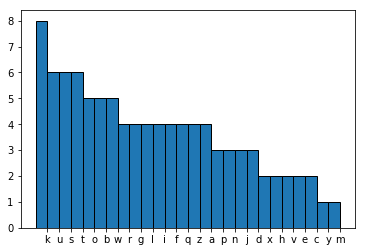

In [45]:
labels, values = zip(*frequency_table.most_common())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, edgecolor="black")
plt.xticks(indexes + width * 0.5, labels)
plt.show()


For comparison, here's the English language's letter frequency graph:

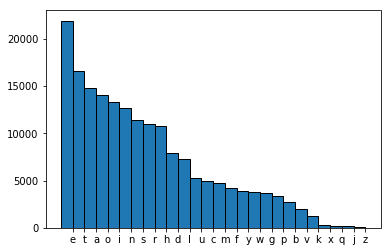

In [43]:
english_frequencies = Counter({'e' : 21912, 't' : 16587, 'a' : 14810, 'o':14003, 'i':13318, 'n':12666, 's':11450, 'r':10977, 'h':10795, 'd':7874, 'l':7253, 'u':5246, 'c':4943, 'm':4761, 'f':4200, 'y':3853, 'w':3819, 'g':3693, 'p':3316, 'b':2715, 'v':2019, 'k':1257, 'x':315, 'q':205, 'j':188, 'z':128})
labels, values = zip(*english_frequencies.items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, edgecolor="black")
plt.xticks(indexes + width * 0.5, labels)
plt.show()

The data was sourced from [this website](http://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html), based on a sample of 40000 words.

As an aside: note that the maximum frequency of K4 is 8 — there's simply not that many letters to look at. **But what if we took the true letter frequencies of the English language, and quantized them into a 0-8 relative scale?**

To see this in action:

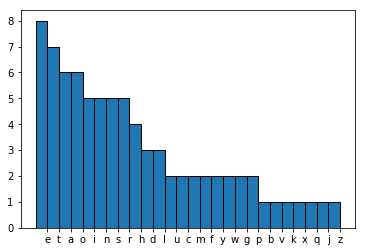

In [37]:
e_max = english_frequencies.most_common(1)[0][1]
partitions = 8 # equivalent to calling 'k4.most_common(1)[0][1]''
english_quantized = {k: np.ceil(v / e_max * 8) for k, v in english_frequencies.items()} # yes, I'm being sloppy with ceilings
labels, values = zip(*english_quantized.items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, edgecolor="black")
plt.xticks(indexes + width * 0.5, labels)
plt.show()

Hmmmm. That's a little close, but not enough to convince me.

As a next step, let's try doing a [Kolmogorov-Smirnov analysis](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) on our sample of English letters vs. K4 based on frequency rank. That'll tell us the likelihood that the characters in K4 are sampled from an English alphabet with similar frequencies to natural English. **THIS DOES NOT SAY THIS A MONOALPHABETIC CIPHER WAS USED,** just that the encryption techniques did not change the underlying letter distribution.

First, convert the frequency dictionaries to store relative instead of absolute frequency (% of a certain character instead of #):

In [55]:
n_english = sum(english_frequencies.values())
n_kryptos = sum(frequency_table.values())
english_relative_freq = {k:(v/n_english) for k, v in english_frequencies.items()}

temp = {k:(v/n_kryptos) for k, v in frequency_table.items()}
kryptos_relative_freq = dict(sorted(temp.items(), key=lambda x: x[1], reverse=True))

print("English language: ",english_relative_freq)
print('\n')
print("Kryptos 4: ", kryptos_relative_freq)

English language:  {'e': 0.12019549870270922, 't': 0.09098588613462202, 'a': 0.08123837786542185, 'o': 0.07681168165087793, 'i': 0.07305420097310522, 'n': 0.06947773761265585, 's': 0.06280752373795274, 'r': 0.06021294218965129, 'h': 0.05921460425774672, 'd': 0.043191828988003486, 'l': 0.03978541219837304, 'u': 0.02877626808116158, 'c': 0.027114199985738028, 'm': 0.02611586205383345, 'f': 0.02303856765933638, 'y': 0.021135143140815018, 'w': 0.020948640450239437, 'g': 0.020257483420459344, 'p': 0.018189497704371293, 'b': 0.014892788379785303, 'v': 0.011074968596238131, 'k': 0.006895114178044245, 'x': 0.0017278925744502285, 'q': 0.0011245015167057042, 'j': 0.0010312501714179142, 'z': 0.0007021277762845373}


Kryptos 4:  {'k': 0.08247422680412371, 'u': 0.061855670103092786, 's': 0.061855670103092786, 't': 0.061855670103092786, 'o': 0.05154639175257732, 'b': 0.05154639175257732, 'w': 0.05154639175257732, 'r': 0.041237113402061855, 'g': 0.041237113402061855, 'l': 0.041237113402061855, 'i': 0

Just by eyeballing it, the Kryptos 4 distribution seems a little "flatter." Let's confirm this with some graphs: 

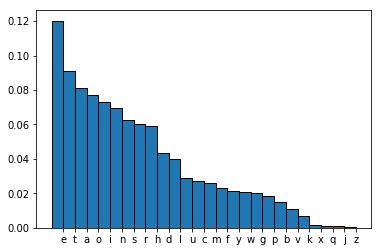

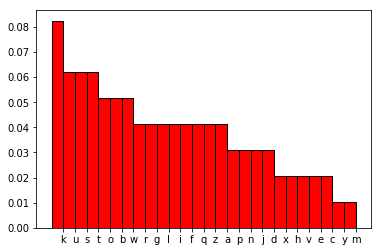

In [60]:
labels, values = zip(*english_relative_freq.items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width, edgecolor="black")
plt.xticks(indexes + width * 0.5, labels)

plt.show()

labels2, values2 = zip(*kryptos_relative_freq.items())
indexes2 = np.arange(len(labels2))
width2 = 1

plt.bar(indexes2, values2, width2, edgecolor="black", color="red")
plt.xticks(indexes2 + width2 * 0.5, labels2)

plt.show()

That seems right. Now for the test.

**Null hypothesis:** The distributions of the two samples are the same.

In [70]:
import scipy.stats as stats
stat = stats.ks_2samp(list(english_relative_freq.values()), list(kryptos_relative_freq.values()))
print(stat)


Ks_2sampResult(statistic=0.30769230769230765, pvalue=0.1382739894213808)


Since `pvalue > 0.05`, we fail to reject the null hypothesis. This means there's a non-trivial chance that the letters come from the same distribution, but it does not **prove** or **disprove** it. Statistically speaking, we would not be "surprised" to see this result *given* the two distributions are the same.

This leads to a key hypothesis: that the masking and encoding techniques do not alter the rank-order frequency distribution of the plaintext.

$\therefore$ 
### Thesis 1: The masking and encoding techniques used in the construction of K4 do not alter the rank-order frequency distribution of the plaintext.

Let's do more analysis! We can calculate the [index of coincidence](https://en.wikipedia.org/wiki/Index_of_coincidence) (IC) of these letters. These are particularly useful for teasing out Vigénere keyword length. The non-normalized IC of the English language is approximately 0.0667. The normalized (non-normalized * # of alphabetic characters) IC is 1.73.

I've written a method for calculating the IC given texts, given below:

In [74]:
def calculateIC(string, ignore_case=True, alphabet=string.ascii_lowercase):
    if (ignore_case):
        string = string.lower()
    counter = frequencies(string, ignore_case, alphabet)
    ic = 0
    n_chars = 0
    for k in counter:
        ic += counter[k] * (counter[k] - 1)
        n_chars += counter[k]
    return ic / (n_chars * (n_chars-1))

ic_k4= calculateIC(k4)
print("Non-normalized:", ic_k4)
print("Normalized:", ic_k4 * len(string.ascii_uppercase))

Non-normalized: 0.03608247422680412
Normalized: 0.9381443298969071


This is a bit on the low side, unfortunately. However, we can "slice" the string by taking every other character and calculating IC on those slices:

In [78]:
ic_k4_slice2_0 = calculateIC(k4[::2])
print("Non-normalized, starting at 0, slice size 2:", ic_k4_slice2_0)
print("Normalized, starting at 0, slice size 2:", ic_k4_slice2_0 * len(string.ascii_uppercase))
print("\n")

ic_k4_slice2_1 = calculateIC(k4[1::2])
print("Non-normalized, starting at 1, slice size 2:", ic_k4_slice2_1)
print("Normalized, starting at 1, slice size 2:", ic_k4_slice2_1 * len(string.ascii_uppercase))

Non-normalized, starting at 0, slice size 2: 0.03231292517006803
Normalized, starting at 0, slice size 2: 0.8401360544217688


Non-normalized, starting at 1, slice size 2: 0.038120567375886524
Normalized, starting at 1, slice size 2: 0.9911347517730497


Feel free to mess around with the below thing to explore other slice sizes:

In [117]:
step = 6
code = k4

# boilerplate
sum_ic = 0
for i in range(step):
    test_slice_ic = calculateIC(code[i::step])
    sum_ic += test_slice_ic
    print("Non-normalized, starting at", i, ", slice size", step, ":", test_slice_ic)
    print("Normalized, starting at", i, ", slice size", step, ":", test_slice_ic * len(string.ascii_uppercase))
    print("\n")
print("Average non-normalized IC:", sum_ic / step)
print("Average normalized IC:", len(string.ascii_uppercase) * sum_ic / step)

    


Non-normalized, starting at 0 , slice size 6 : 0.022058823529411766
Normalized, starting at 0 , slice size 6 : 0.573529411764706


Non-normalized, starting at 1 , slice size 6 : 0.03333333333333333
Normalized, starting at 1 , slice size 6 : 0.8666666666666667


Non-normalized, starting at 2 , slice size 6 : 0.058333333333333334
Normalized, starting at 2 , slice size 6 : 1.5166666666666666


Non-normalized, starting at 3 , slice size 6 : 0.025
Normalized, starting at 3 , slice size 6 : 0.65


Non-normalized, starting at 4 , slice size 6 : 0.025
Normalized, starting at 4 , slice size 6 : 0.65


Non-normalized, starting at 5 , slice size 6 : 0.016666666666666666
Normalized, starting at 5 , slice size 6 : 0.43333333333333335


Average non-normalized IC: 0.030065359477124184
Average normalized IC: 0.7816993464052288


The NSA documents requested via FOIA (will provide link when I find one) confirm that there seems to be higher IC with step size 7 (average normalized IC of 1.08); however, it's not a very strong effect since it's so close to 1. Set `step_size = 7` and see for yourself. 

However, if it is true that the masking and encoding techniques don't overall touch the frequency distribution, we should be seeing an IC close in value to that of the raw K4 text coinciding with some keyword size n **if** Vigénere encryption techniques were used. Note that K3 has IC = 1.720, very close to natural English!

Also, it is interesting to note that K1 has IC values similar to that of K4: the IC of K1 is `0.03789042498719918`, but the IC of K4 is `0.03608247422680412`, approximately a 5% difference. Due to the shorter nature of these strings, however, there is more uncertainty when speculating.

As a sanity check, feel free to run the code on K1 with the key-length of "PALIMPSEST" (10). You'll find very high ICs. A similar effect is visible on K2 with the key-length of "ABSCISSA" (8). The fact that no similar strong pattern emerges **strongly suggest that this is not a pure Vigenere encrypted polyalphabetic substitution cipher** — but that was generally accepted already.

But what if there is some decryption technique that leads to a middle-text digestible by modern cryptanalytic methods? In other words, if we find $g^{-1}$ and apply it to k4, we should reach some intermediary text that yields better IC values if the masking technique is a Vigenere cipher. The masking technique used ought to leave some statistical fingerprint, traces of which can be found after encryption.

So the question now is — what sort of transformations on k4 yield statistically interesting text? Furthermore, if we maintain consistency with **Thesis 1**, what such transformations do not change the underlying rank-order distribution of frequencies? Making use of the observation that the ciphertext distribution seems "squashed" - what transformations exist to squeeze/unsqueeze (?) entropy from a text?

## Other Fun Coincidences

Recall the coordinates in the plaintext of K2: `38* 57' 6.5" N 77* 8' 44" W`. If we add up those digits, we get 64, and keeping a cumulative sum, nothing super-meaningful happens. 

However, if you begin summing from the **ordinate** of the coordinates (the second element of a coordinate system, the counterpart to the **abscissa**), you reach:

$7 + 7 + 8 + 4 + 4 + 3 + 8 + 5 + 7 + 6 + 5 + 7 + 7 + 8 + 4 + 4 + 3 = 97$

This is exactly the length of k4. 

The coordinates are very near Kryptos, which was likely intentional, and it would be very difficult to contrive a passphrase of this exact shape given real-world coordinates. But, as we know, the coordinates are slightly off. There's a lot of speculation about what it points to — *what if the discrepancy is intentional, and part of the message?*

$\therefore$

### Hypothesis S0 (S for silly): The key to solving K4 is in a phrase with exactly the shape described in the sum above.

Extra tinfoil: the length of Berlin is 6 and Clock is 5. 6 and 5 are next to each other in the above sum. Coincidence??? I dunno, probably.

Ok, tinfoil hat off. It is also incredibly unlikely for a phrase to take this shape given how common 2 and 3-letter words are. This also belies the masking => encryption model hinted at by JS.


#### Addendum to S0

However, as Page 10.1 of the uploaded field manual of cryptoanalysis [notes](https://xa.yimg.com/df/Kryptos/ch10.pdf?token=YVi-YsY3RpNZAtW4YdlyW2ODzeOQkQVrYEmusdKY4d5Fm1HFZKEP-3_gpwpUsU6yCRDSyWvLbYkQMqq7g9a5HWC28ZmVHwjhFJoYxd8_vNp9QcCeP_Smtwed35HeXdhFLJ1FpNdP31JU3TSyhIB3lmGyL4mzPCnzAHwUXfBXpIvs&type=download), the digits 3 through 8 (6 total digits) could be arranged in such a way with a keyword to produce a table like the diagram shown.  